In [2]:

# What if we wanted to download historical weather data by making API calls to an end-point, normalize the JSON
# string that we get from the calls, do some simple aggregation on the column named 'precip' (which is precipitation), 
# and finally plat the results on a folium map, so we can see which areas received the most precipitation in 
# the past n-days. The code below does exactly that.


In [12]:

import requests
import pandas as pd
from pandas import json_normalize
import geopandas as gpd
import folium
from folium import Choropleth, CircleMarker
from folium.plugins import MarkerCluster

# you need to procure your own API key
api_key = 'your_api_key_here'
base_url = 'https://api.weatherbit.io/v2.0/history/daily'

# Common parameters
common_params = {
    'country': 'US',
    'start_date': '2023-12-01',
    'end_date': '2023-12-15',
    'key': api_key,
}

# Function to get historical weather data for a postal code
def get_weather_data(postal_code):
    params = {**common_params, 'postal_code': postal_code}
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error for Postal Code {postal_code}: {response.status_code}, {response.text}")
        return None

# Choose start and end zip codes
start_zip_code = 10001
end_zip_code = 10100  # Adjust as needed

# Create an empty DataFrame
df = pd.DataFrame()

# Loop through postal codes and append results to the DataFrame
for postal_code in range(start_zip_code, end_zip_code + 1):
    postal_code_str = str(postal_code)
    
    # Get weather data
    weather_data = get_weather_data(postal_code_str)
    
    if weather_data:
        # Normalize the 'data' column
        normalized_data = json_normalize(weather_data, 'data', sep='_')
        
        # Add 'PostalCode' column
        normalized_data['PostalCode'] = postal_code_str
        
        # Append to DataFrame
        df = df.append(normalized_data, ignore_index=True)

# Print or further process the DataFrame
print(df)
   

C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ignore_index=True)
C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ignore_index=True)
C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ignore_index=True)
C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ign

C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ignore_index=True)
C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ignore_index=True)
C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ignore_index=True)
C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ign

C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ignore_index=True)
C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ignore_index=True)
C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ignore_index=True)
C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\3977367271.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(normalized_data, ign

Error for Postal Code 10093: 429, {"status_code":429,"status_message":"Your request count (1506) is over the allowed limit of 1500 per day - Upgrade your key, or retry after 396.53333333333 minutes"}

Error for Postal Code 10094: 429, {"status_code":429,"status_message":"Your request count (1520) is over the allowed limit of 1500 per day - Upgrade your key, or retry after 396.51666666667 minutes"}

Error for Postal Code 10095: 429, {"status_code":429,"status_message":"Your request count (1534) is over the allowed limit of 1500 per day - Upgrade your key, or retry after 396.51666666667 minutes"}

Error for Postal Code 10096: 429, {"status_code":429,"status_message":"Your request count (1548) is over the allowed limit of 1500 per day - Upgrade your key, or retry after 396.51666666667 minutes"}

Error for Postal Code 10097: 429, {"status_code":429,"status_message":"Your request count (1562) is over the allowed limit of 1500 per day - Upgrade your key, or retry after 396.5 minutes"}

Error

In [13]:

# Group by 'PostalCode' and sum the 'precip' column
aggregated_df = df.groupby('PostalCode')['precip'].sum().reset_index()

# Print or further process the aggregated DataFrame
print(aggregated_df)


   PostalCode  precip
0       10001    64.4
1       10002    70.1
2       10003    64.4
3       10004    76.5
4       10005    70.1
..        ...     ...
87      10088    70.1
88      10089    70.1
89      10090    57.6
90      10091    64.4
91      10092    64.4

[92 rows x 2 columns]


In [6]:

# Load GeoDataFrame with zip code geometries (replace with your shapefile)
# all related files must be in the same folder as the 'cb_2019_us_zcta510_500k.shp' file.
gdf_zip = gpd.read_file('C:\\Users\\cb_2019_us_zcta510_500k.shp')

# Print column names
print("Column Names in GeoDataFrame:")
print(gdf_zip.columns)


Column Names in GeoDataFrame:
Index(['ZCTA5CE10', 'AFFGEOID10', 'GEOID10', 'ALAND10', 'AWATER10',
       'geometry'],
      dtype='object')


In [14]:

# Merge with aggregated precipitation data
merged_data = gdf_zip.merge(aggregated_df, left_on='ZCTA5CE10', right_on='PostalCode', how='left')

# Filter only rows with precipitation data
merged_data_filtered = merged_data.dropna(subset=['precip'])

# Create a folium map centered around the geographic center of your data
# if you don't do this step, the map will probably be too busy to read because everything in the USA will be plotted.
map_center = [merged_data_filtered.geometry.centroid.y.mean(), merged_data_filtered.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=10, tiles='cartodb positron')

# Create Choropleth layer
Choropleth(
    geo_data=merged_data_filtered,
    data=merged_data_filtered,
    columns=['PostalCode', 'precip'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Precipitation Sum'
).add_to(mymap)

# Display the map
mymap


C:\Users\ryans\AppData\Local\Temp\ipykernel_12484\290921626.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [merged_data_filtered.geometry.centroid.y.mean(), merged_data_filtered.geometry.centroid.x.mean()]


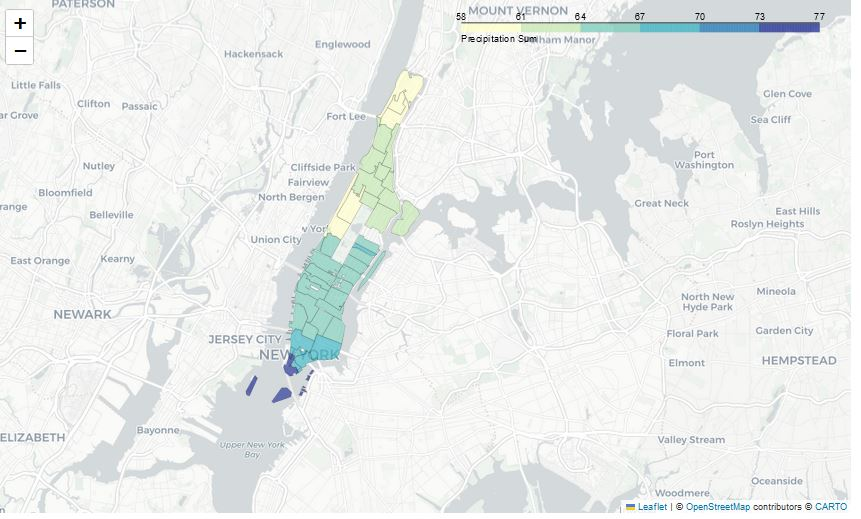

In [16]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryans\\"
Image(filename = PATH + "Capture.JPG")


In [4]:

# weather data sourced from:
# https://www.weatherbit.io/api/historical-weather-daily

# list of NY zip codes sourced from:
# https://www.unitedstateszipcodes.org/ny/

# shapley data:
# https://catalog.data.gov/dataset/2019-cartographic-boundary-shapefile-2010-zip-code-tabulation-areas-for-united-states-1-500000
